In [21]:
from cube import cube
import numpy as np
import matplotlib
from math import factorial
import time
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    'figure.figsize': (10,10),
    'font.size': 18
})

%matplotlib widget

In [2]:
my_cube = cube()

In [3]:
my_cube.reset_state()


In [3]:
move_list = my_cube.get_move_list()

to_move = move_list[0] + " " + move_list[5] + " " + move_list[6] + " " + move_list[9]

print(to_move)

prospective_state = my_cube.string_operation(to_move, False)
print(prospective_state)
print(my_cube.get_moved_set())

F B2 U D
None
['F', 'B', 'B', 'U', 'D']


In [6]:
print(my_cube.calculate_multiplicity(my_cube.get_curr_state()))

1
2
3
4
5
6
6


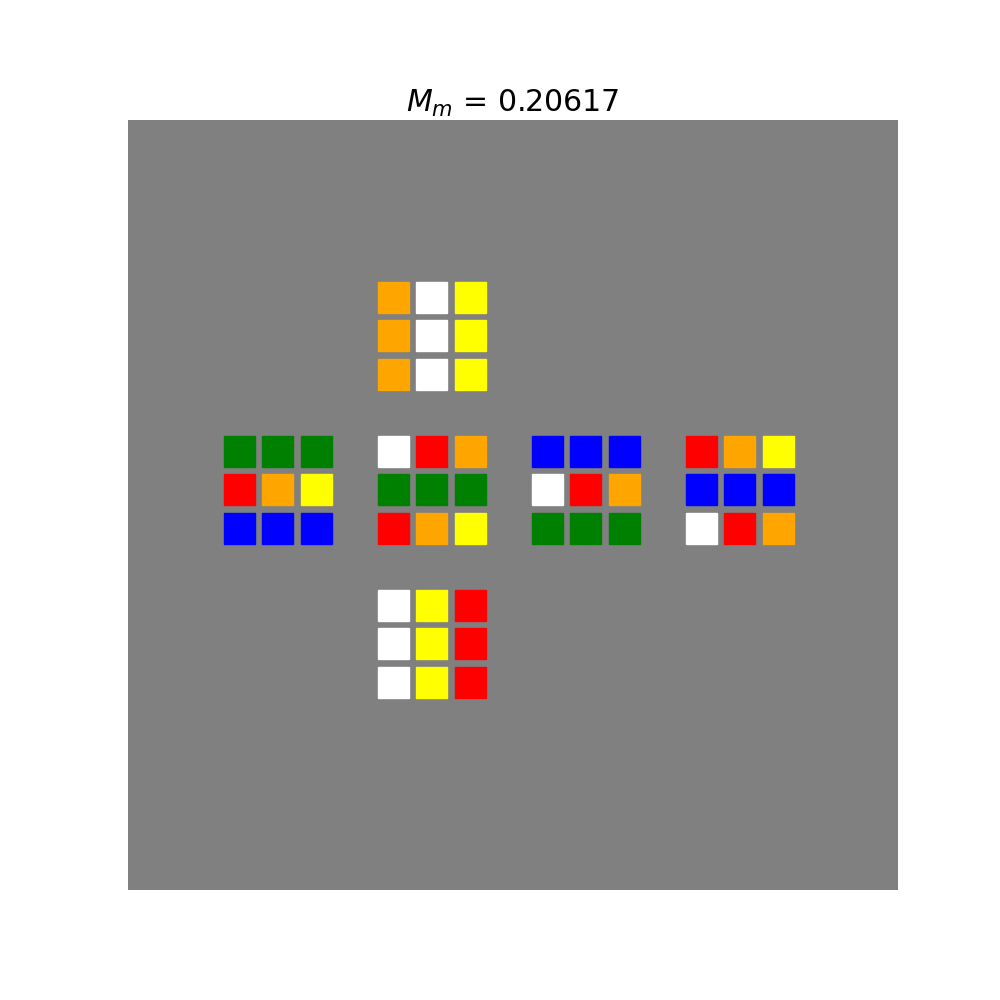

In [5]:
my_cube.button_operation()

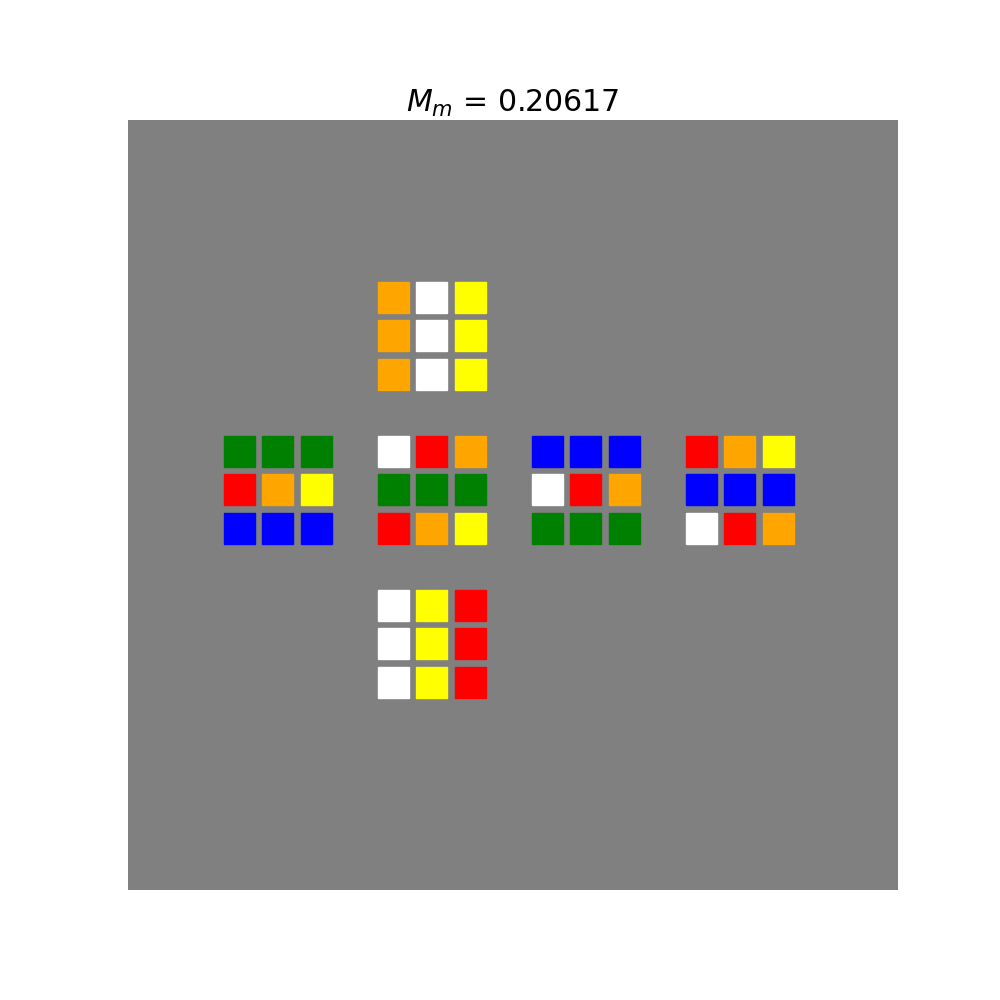

In [28]:
fig = plt.figure(1)

ax = fig.add_subplot()

my_cube.visualise_state(ax)

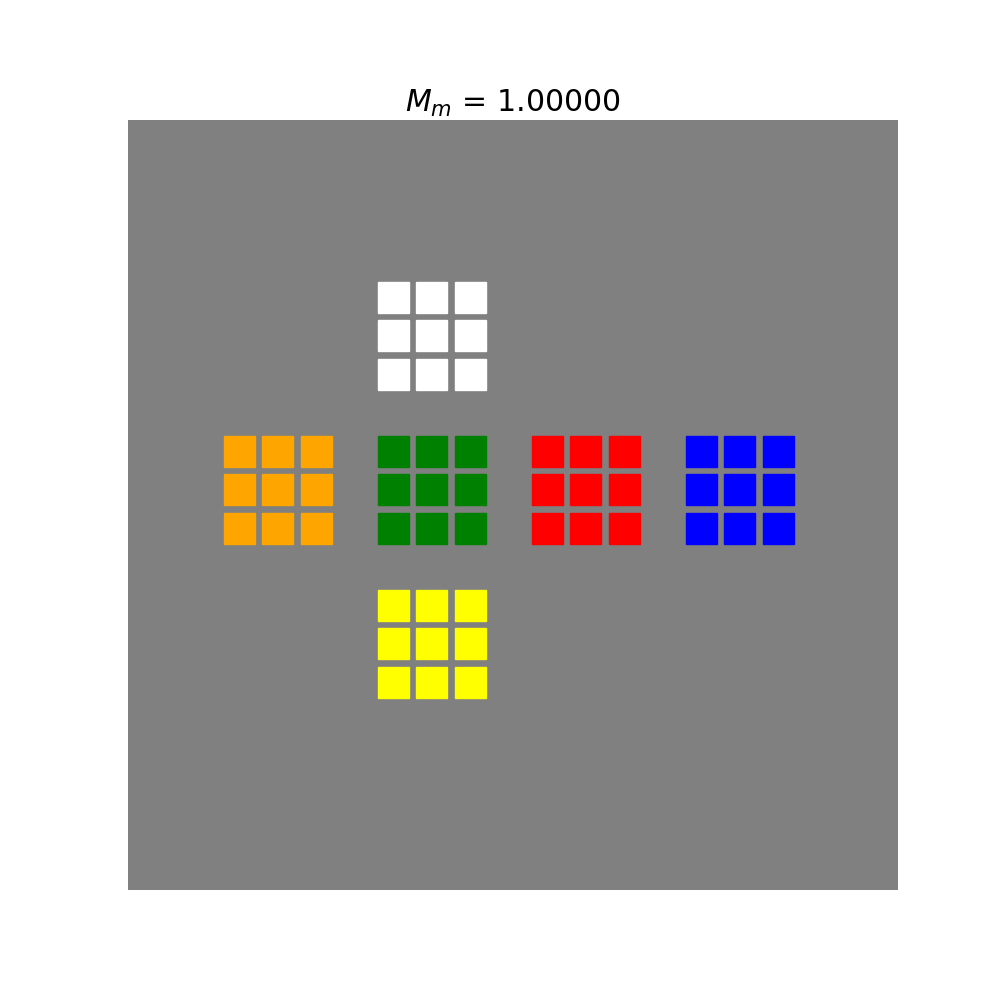

In [3]:
my_cube.button_operation()

In [5]:
print(my_cube.get_move_set())

['F', 'U', 'R', 'U', "F'", "R'", 'U']


In [24]:
multiplicities = np.zeros((6,6,6,6,6,6,6,6,6), dtype=np.uint16)

In [25]:
def normal_ordering(face):
    # create a dictionary where the key is the old colour and the value is the "normal ordering" colour
    temp_dict = {}
    for entry in face:
        if entry in temp_dict.keys():
            pass
        else:
            temp_dict[entry] = len(temp_dict.values())

    new_face = []    
    for entry in face:
        new_face.append(temp_dict[entry])

    return new_face

In [22]:
face = [0,0,0,0,0,0,0,0,0]

In [23]:
def rotate(face):
    new_face = [0,0,0,0,0,0,0,0,0]
    new_face[0] = face[6]
    new_face[1] = face[3]
    new_face[2] = face[0]
    new_face[3] = face[7]
    new_face[4] = face[4]
    new_face[5] = face[1]
    new_face[6] = face[8]
    new_face[7] = face[5]
    new_face[8] = face[2]

    return new_face

def reflect_f(face):
    new_face = [0,0,0,0,0,0,0,0,0]
    new_face[0] = face[2]
    new_face[1] = face[1]
    new_face[2] = face[0]
    new_face[3] = face[5]
    new_face[4] = face[4]
    new_face[5] = face[3]
    new_face[6] = face[8]
    new_face[7] = face[7]
    new_face[8] = face[6]

    return new_face

def reflect_d(face):
    new_face = [0,0,0,0,0,0,0,0,0]
    new_face[0] = face[8]
    new_face[1] = face[5]
    new_face[2] = face[2]
    new_face[3] = face[7]
    new_face[4] = face[4]
    new_face[5] = face[1]
    new_face[6] = face[6]
    new_face[7] = face[3]
    new_face[8] = face[0]

    return new_face



In [26]:
count = 0
multiplicities = np.zeros((6,6,6,6,6,6,6,6,6), dtype=np.uint16)

for a in range(6):
    face[0] = a
    for b in range(6):
        face[1] = b
        for c in range(6):
            face[2] = c
            for d in range(6):
                face[3] = d
                for e in range(6):
                    face[4] = e
                    for f in range(6):
                        face[5] = f
                        for g in range(6):
                            face[6] = g
                            for h in range(6):
                                face[7] = h
                                for i in range(6):
                                    face[8] = i

                                    n_o_face = normal_ordering(face)

                                    M = [n_o_face, 
                                         normal_ordering(rotate(n_o_face)), 
                                         normal_ordering(rotate(rotate(n_o_face))),
                                         normal_ordering(rotate(rotate(rotate(n_o_face)))),
                                         normal_ordering(reflect_f(n_o_face)),
                                         normal_ordering(reflect_d(n_o_face)),
                                         normal_ordering(reflect_d(rotate(n_o_face))),
                                         normal_ordering(rotate(reflect_f(n_o_face)))]
                                    
                                    to_pop = []
                                    for el_count, el in enumerate(M[1:]):
                                        if el in M[:el_count+1]:
                                            to_pop.append(el_count+1)
                                    
                                    for el in to_pop[::-1]:
                                        M.pop(el)
                                    
                                    multiplicity = len(M) * factorial(6) / factorial(6-(max(M[0])+1))

                                    multiplicities[a,b,c,d,e,f,g,h,i] = multiplicity

                                    count += 1

                        


In [27]:
print(np.max(multiplicities))

4320


In [29]:
print(multiplicities[0,0,0,0,0,0,0,0,0])

6


In [30]:
np.save('multiplicities_save_2.npy', multiplicities)

In [35]:
mults_2 = np.load('multiplicities_save_2.npy')
mults = np.load('multiplicities_save.npy')

In [36]:
print(mults[0,0,0,0,0,0,0,0,0])


1


In [17]:
a = np.array([0,1,2,3,500,216], dtype=np.uint8)

/tmp/ipykernel_374337/2115100034.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 500 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  a = np.array([0,1,2,3,500,216], dtype=np.uint8)


In [18]:
a

array([  0,   1,   2,   3, 244, 216], dtype=uint8)